In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('train.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [5]:
data.head(3)

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j


In [6]:
for col in data.columns:
    print(col,':',len(data[col].unique()))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [26]:
top10 =data.X2.value_counts().head(10)

In [28]:
top10 = [x for x in top10.index]

In [29]:
top10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [36]:
for i in top10:
    label = np.where(data['X2']==i,1,0)
    


In [43]:
def on_hot_top_x(df,variable,top_x_labels):
    for i in top_x_labels:
        df[variable+'_'+i] = np.where(data[variable]==i,1,0)
data = pd.read_csv('train.csv',usecols=['X0','X1','X2','X3','X4','X5','X6']) 




on_hot_top_x(data ,'X2',top10)
data.head()

,X0,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


# OneHotEncoding

In [7]:
data =pd.read_csv('train.csv',usecols = ['X0','X1','X2','X3'])

In [8]:
dt = data.head(5)

In [9]:
dt

,X0,X1,X2,X3
0,k,v,at,a
1,k,t,av,e
2,az,w,n,c
3,az,t,n,f
4,az,v,n,f


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
from sklearn.compose import ColumnTransformer

In [31]:
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0])],remainder = 'passthrough')


In [32]:
hot = np.array(ct.fit_transform(dt))

In [33]:
hot

array([[0.0, 1.0, 'v', 'at', 'a'],
       [0.0, 1.0, 't', 'av', 'e'],
       [1.0, 0.0, 'w', 'n', 'c'],
       [1.0, 0.0, 't', 'n', 'f'],
       [1.0, 0.0, 'v', 'n', 'f']], dtype=object)

# short cut to OneHotEncoding

In [11]:
pd.get_dummies(dt)

,X0_az,X0_k,X1_t,X1_v,X1_w,X2_at,X2_av,X2_n,X3_a,X3_c,X3_e,X3_f
0,0,1,0,1,0,1,0,0,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,1,0,0
3,1,0,1,0,0,0,0,1,0,0,0,1
4,1,0,0,1,0,0,0,1,0,0,0,1


# LabelEncoding

In [34]:
dt

,X0,X1,X2,X3
0,k,v,at,a
1,k,t,av,e
2,az,w,n,c
3,az,t,n,f
4,az,v,n,f


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [43]:
dt['X0'] = le.fit_transform(dt['X0'])
dt['X1'] = le.fit_transform(dt['X1'])
dt['X2'] = le.fit_transform(dt['X2'])
dt['X3'] = le.fit_transform(dt['X3'])


<ipython-input-43-915c1ca713c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['X0'] = le.fit_transform(dt['X0'])
<ipython-input-43-915c1ca713c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['X1'] = le.fit_transform(dt['X1'])
<ipython-input-43-915c1ca713c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [44]:
dt

,X0,X1,X2,X3
0,1,1,0,0
1,1,0,1,2
2,0,2,2,1
3,0,0,2,3
4,0,1,2,3


# to get column names

In [3]:
data = pd.read_csv('train.csv')

In [8]:
[*data] ##to get column names 

['ID',
 'y',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X8',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X122',
 'X123',
 'X124',
 'X125',
 '

In [21]:
data.iloc[:1,1:10]

,y,X0,X1,X2,X3,X4,X5,X6,X8
0,130.81,k,v,at,a,d,u,j,o


In [29]:
data['X20'].mean()

0.14278926110715134

In [7]:
data = pd.read_csv('Book1.csv')

# missing values with mean/median/mode

In [10]:
data.isnull().mean()   # to get percentage of null values in columns

categoty       0.000000
sales price    0.000000
profit         0.157895
dtype: float64

In [13]:
data['profit']

0     2000.0
1     2500.0
2     2000.0
3     2500.0
4        NaN
5      250.0
6     2000.0
7       20.0
8        NaN
9       50.0
10      10.0
11       5.0
12       NaN
13       4.0
14       5.0
15      20.0
16      40.0
17      35.0
18      40.0
Name: profit, dtype: float64

In [20]:
Nan = print(data.profit.median())

40.0


In [19]:
print(data.profit.mean())

717.4375


In [23]:
data['profit'].fillna(40.0)

0     2000.0
1     2500.0
2     2000.0
3     2500.0
4       40.0
5      250.0
6     2000.0
7       20.0
8       40.0
9       50.0
10      10.0
11       5.0
12      40.0
13       4.0
14       5.0
15      20.0
16      40.0
17      35.0
18      40.0
Name: profit, dtype: float64

In [24]:
print(data.profit.mean())

717.4375


# Random sample Imputation

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])

In [6]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
median = data['Age'].median()
median

28.0

In [8]:
data['Age'].isnull().sum()

177

In [9]:
data['Age'].dropna().sample(177,random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [10]:
index = data[data['Age'].isnull()].index

In [11]:
index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [28]:
def impute_Nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample
    

In [29]:
impute_Nan(data,'Age',median)

In [31]:
data.head()

,Survived,Age,Fare,Age_median,Age_random,22.0,38.0,26.0,35.0,35.0,...,33.0,22.0,28.0,25.0,39.0,27.0,19.0,NaN,26.0,32.0
0,0,22.0,7.2500,22.0,22.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,38.0,71.2833,38.0,38.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,26.0,7.9250,26.0,26.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,35.0,53.1000,35.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,35.0,8.0500,35.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# probability ratio sampling

In [1]:
import pandas as pd

In [25]:
import numpy as np

In [4]:
data = pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])

In [5]:
data.head(5)

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [9]:
data['Cabin'] = data['Cabin'].astype(str).str[0]

In [10]:
data.head(5)

,Survived,Cabin
0,0,n
1,1,C
2,1,n
3,1,C
4,0,n


In [12]:
prob = data.groupby(['Cabin'])['Survived'].mean()

In [16]:
prob_df = pd.DataFrame(prob)

In [17]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
n,0.299854


In [18]:
prob_df['died'] = 1-prob_df['Survived']

In [19]:
prob_df

,Survived,died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
T,0.000000,1.000000
n,0.299854,0.700146


In [20]:
prob_df['ratio'] = prob_df['Survived']/prob_df['died']

In [28]:
prob_df.shape

(9, 3)

In [29]:
prob_encoded = prob_df['ratio'].to_dict()

In [30]:
prob_encoded

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'T': 0.0,
 'n': 0.42827442827442824}

In [33]:
data['cabin_encoded'] = data['Cabin'].map(prob_encoded)

In [34]:
data.head(5)

,Survived,Cabin,cabin_encoded
0,0,n,0.428274
1,1,C,1.458333
2,1,n,0.428274
3,1,C,1.458333
4,0,n,0.428274


# outliers

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
import seaborn as sns

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

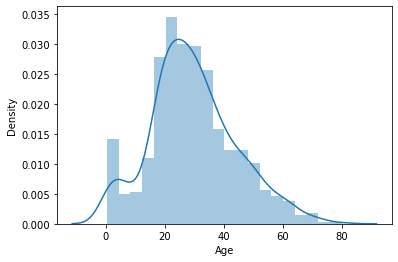

In [7]:
sns.distplot(df['Age'].dropna())

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

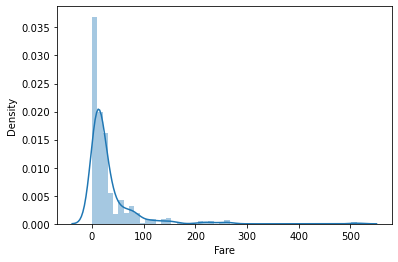

In [8]:
sns.distplot(df['Fare'])

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

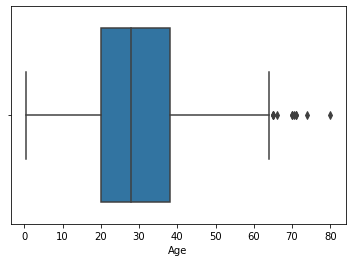

In [11]:
sns.boxplot(df['Age'])

In [12]:
df['Age'].mean()

29.69911764705882

In [13]:
df['Age'].std()

14.526497332334044

In [14]:
upper = df['Age'].mean()+(3*df['Age'].std())

In [16]:
lower = df['Age'].mean()-(3*df['Age'].std())

In [17]:
lower, upper

(-13.88037434994331, 73.27860964406095)

In [18]:
data = df.copy()

In [20]:
df.loc[df['Age']>=73,'Age']=73

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

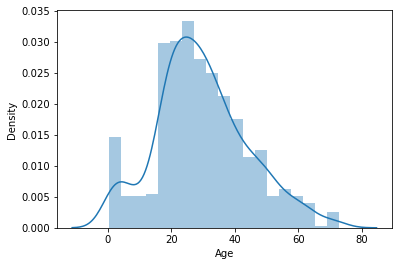

In [21]:
sns.distplot(df['Age'])

# for skewed data (outliers)

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

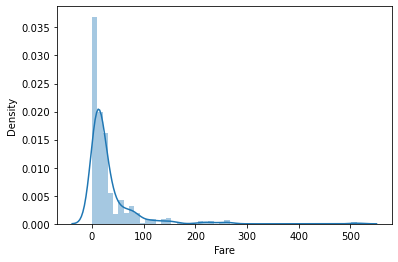

In [22]:
sns.distplot(df['Fare'].dropna())

In [23]:
df['Fare'].mean()

32.2042079685746

In [24]:
df['Fare'].std()

49.693428597180905

In [28]:
q1 = df['Fare'].quantile(0.25)

In [29]:
q3 = df['Fare'].quantile(0.75)

In [30]:
IQR = q3-q1

In [31]:
IQR

23.0896

In [33]:
upper = q3+(IQR*1.5)

In [34]:
lower = q1-(IQR*1.5)

In [35]:
upper,lower

(65.6344, -26.724)

In [36]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [37]:
#for extreme range we can take 3 std
lower = q1-(IQR*3)
upper = q3+(IQR*3)

In [38]:
lower,upper

(-61.358399999999996, 100.2688)

In [40]:
df.loc[df['Fare']>=100,'Fare']=100

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

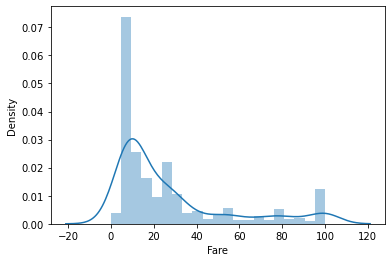

In [41]:
sns.distplot(df['Fare'])